In [71]:
import rosbag
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tf
from scipy.signal import find_peaks

In [72]:
bag = rosbag.Bag('/home/hakanergin/code/rosbags/static/rotation/25h9/s_yaw_25h9_2m_720_30.bag')

# create variables
target = 'yaw'
true_value = 'true_yaw'

# input values in degrees. the order matters, it will be used for binning 
input_vals = [0,15,30,45,60,75]

In [73]:
topic = '/tf'

rows = []

for topic, msg, t in bag.read_messages(topics=topic):
    
    time = t

    # conversion to euler
    rotation_quat = msg.transforms[0].transform.rotation
    pitch, yaw, roll = tf.transformations.euler_from_quaternion([rotation_quat.x,rotation_quat.y,rotation_quat.z,rotation_quat.w], axes='rxyz')

    # all rotations
    # rotation_euler = (np.degrees(pitch), np.degrees(yaw), np.degrees(roll))

    # create row
    row={'time': time.to_sec(), target: np.degrees(yaw)}
    rows.append(row)

df = pd.DataFrame.from_records(rows)

In [74]:
# calculate relative time in seconds instead of absolute time
df['relative_time'] =  df.loc[0:, 'time'] - df.at[0, 'time']
df = df.drop(columns=['time'])
df = df[['relative_time', target]]
df

,relative_time,yaw
0,0.000000,25.661169
1,1.160219,2.479385
2,1.598005,1.845143
3,2.013864,0.963589
4,2.445727,2.132317
...,...,...
780,93.897207,0.919506
781,94.004429,0.914214
782,94.105140,0.911478
783,94.194727,0.931567


<AxesSubplot:xlabel='relative_time'>

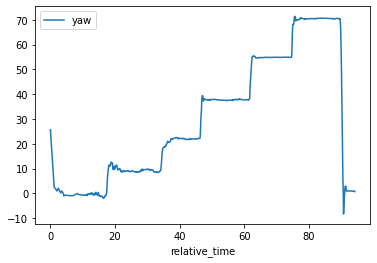

In [75]:
# initial graph
df.plot(x='relative_time', y=target)

In [76]:
# find plateaus
x = df[target]
peaks, _ = find_peaks(x, threshold=(0, 1)) # from find_peaks docs: Threshold: The first element is always interpreted as the minimal and the second, if supplied, as the maximal required threshold.

In [77]:
# the amount of data points we are left with
len(x[peaks])

197

In [78]:
# create filtered data frame
df_filtered_by_targets = df.loc[peaks]

<AxesSubplot:xlabel='relative_time', ylabel='yaw'>

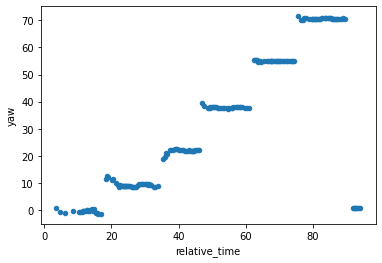

In [79]:
df_filtered_by_targets.plot.scatter(x='relative_time', y=target)

In [80]:
# segmenting/binning by real value
df_filtered_by_targets[true_value] = pd.qcut(df_filtered_by_targets[target], len(input_vals), labels=input_vals, duplicates='drop')

In [81]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_filtered_by_targets)

,relative_time,yaw,true_yaw
7,3.493020,1.001053,0
10,4.568918,-0.627674,0
13,6.233508,-0.860418,0
19,8.411688,-0.047453,0
24,10.240781,-0.710674,0
28,10.689782,-0.609313,0
32,11.135334,-0.591496,0
35,11.450081,-0.296081,0
37,11.656839,-0.197913,0
39,11.879838,-0.233461,0


In [82]:
# calculate the error
df_filtered_by_targets['error'] =  df_filtered_by_targets.apply(lambda row: row[true_value] - row[target], axis=1)

In [83]:
# remove huge errors because theyre actually wrongly binned
df_filtered_by_targets = df_filtered_by_targets.drop(df_filtered_by_targets[df_filtered_by_targets['error'].abs()>9].index)

In [84]:
grouped_df = df_filtered_by_targets.groupby(true_value)

In [85]:
# verify if the bins are in correct order, this is dictated by input_vals order
grouped_df.tail(2)

,relative_time,yaw,true_yaw,error
230,32.796009,8.785195,15,6.214805
240,33.913550,9.015093,15,5.984907
347,45.675461,22.143889,30,7.856111
352,46.220378,22.205642,30,7.794358
480,60.264019,37.807704,45,7.192296
487,61.049907,37.822473,45,7.177527
603,74.009299,54.884863,60,5.115137
606,74.315785,54.912193,60,5.087807
739,89.078447,70.642139,75,4.357861
743,89.502509,70.546015,75,4.453985


In [86]:
grouped_df.error.describe()

,count,mean,std,min,25%,50%,75%,max
true_yaw,,,,,,,,
0,33.0,-0.248918,1.671904,-8.546190,-0.931567,0.167330,0.609313,1.313810
15,33.0,5.811181,0.366396,5.208313,5.483314,5.887117,6.138589,6.356007
30,24.0,7.909427,0.291676,7.430745,7.787395,7.881132,8.014800,8.951354
45,31.0,7.122185,0.340383,5.567211,7.070747,7.173774,7.311612,7.509929
60,30.0,5.035020,0.160973,4.545249,5.051308,5.081086,5.115036,5.197725
75,33.0,4.381851,0.171562,3.571563,4.346294,4.413410,4.464015,4.560807


In [87]:
def box_plotter(column_name):
    fig, axes = plt.subplots(1,len(input_vals))

    for i, val in enumerate(input_vals):
        grouped_df.get_group(val).boxplot(column=column_name, ax=axes.flatten()[i])
        axes.flatten()[i].set_title(val)


    plt.tight_layout()
    plt.show()

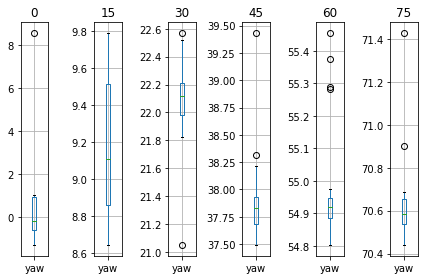

In [88]:
box_plotter(target)

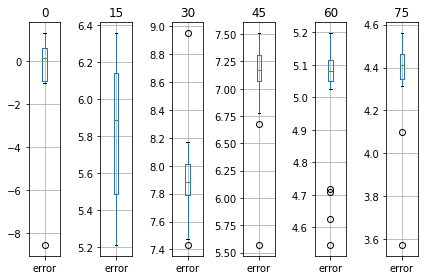

In [89]:
box_plotter('error')